## import important libraries

In [222]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn import preprocessing

## reading dataset

In [223]:
#read train dataset
train_df=pd.read_csv("Train.csv")
#read test dataset
test_df=pd.read_csv("Test.csv")

# Explore data set

In [224]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [225]:
test_df.info()
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

## Exploratory Data Analysis

In [226]:
#figure show fat distribution by item 
px.histogram(train_df,x="Item_Type",color="Item_Fat_Content",color_discrete_sequence = px.colors.qualitative.Dark24,title="fat Distribution")

In [238]:
# figer shaw relation between fat and sells operation
px.histogram(train_df,x="Item_Fat_Content",y="Item_Outlet_Sales",color_discrete_sequence=px.colors.qualitative.Dark24)

from last figure low fat product was sold more than regular

In [228]:
#figure show sales distribution by location
px.scatter(train_df,x="Item_Outlet_Sales",color="Outlet_Location_Type",color_discrete_sequence = px.colors.qualitative.Dark24)


in last figure the location doesnt make difference on sales

In [237]:
px.histogram(train_df,x="Outlet_Type",y="Item_Outlet_Sales",color_discrete_sequence=px.colors.qualitative.Dark24)

from last figure supermarket type 1 is best market sell product

In [232]:
px.histogram(train_df,x="Item_Type",y="Item_MRP",color_discrete_sequence=px.colors.qualitative.Dark24)

in last figure 'fruits and vegetabels' and 'snack foods' are the most product have high price

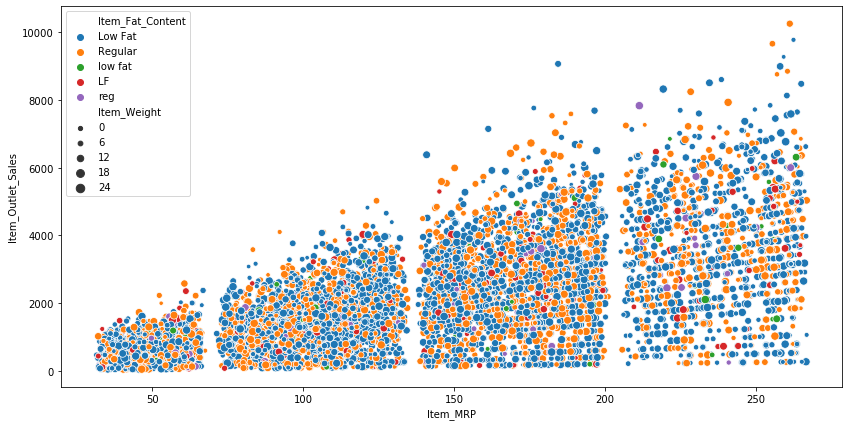

In [233]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=train_df,x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight')

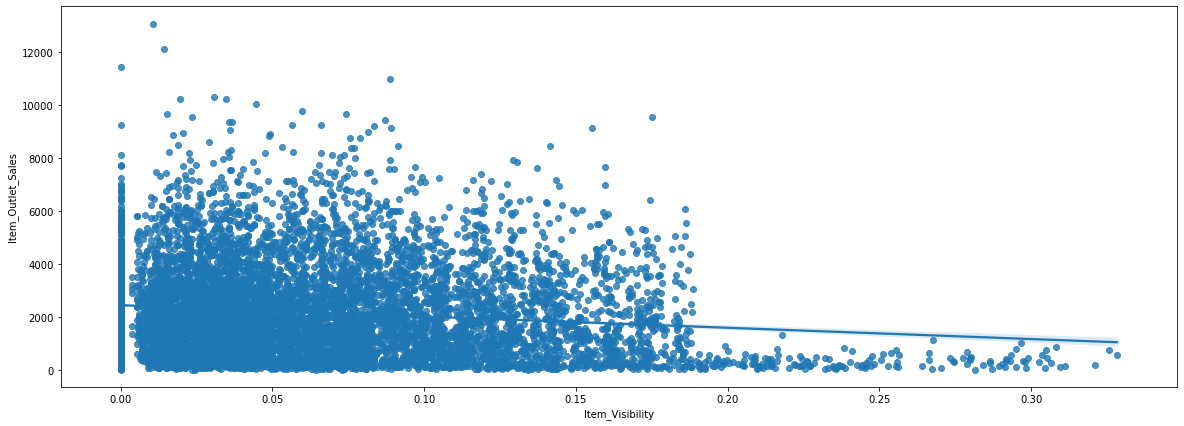

In [234]:
plt.figure(figsize=(20,7))
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train_df)


from last figuer there are very week correlation with target column.

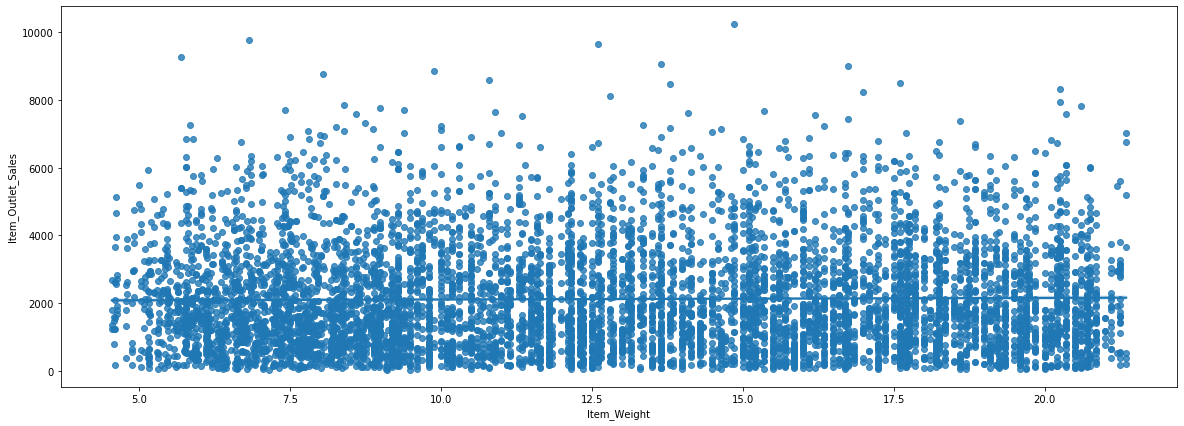

In [235]:
plt.figure(figsize=(20,7))
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=train_df)

there is no corr here too

In [236]:
px.imshow(train_df.corr())

# data cleaning

check duplicated

In [5]:
# chek duplicated in train dataset
print(train_df.duplicated().sum())
# chek duplicated in test dataset
print(test_df.duplicated().sum())

0
0


check nan values

In [6]:
print(train_df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
#check outliers and there are no outliers
px.box(train_df,"Item_Weight")

 fill nan values

In [8]:
#fill nan in train data set "Item_weight"
train_df["Item_Weight"].fillna(train_df["Item_Weight"].mean(),inplace=True)

In [9]:
train_df["Item_Outlet_Sales"]=train_df["Item_Outlet_Sales"].astype('int32')

In [10]:
train_df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1               3735  
1     Supermarket Type2                443  
2     Supermarket Type1               2097  
3         Grocery Store                732  
4     Supermarket Type1                994  
...                 ...                ...  
8518  Supermarket Type1               2778  
8519  Supermarket Type1                549  
8520  Supermarket Type1               1193  
8521  Supermarket Type2               1845  
8522  Supermarket Type1                765  

[8523 rows x 12 columns]

In [11]:
#every outlet size hasits own code so i specified the code and size then i fill nan 
def get_size(row):
    data = {
        'OUT010': 'High',
        'OUT045': 'Medium',
        'OUT017': 'Medium'
    }
    if row['Outlet_Size'] is np.nan or row['Outlet_Size'] is None:
        return data.get(row['Outlet_Identifier'])
    return row['Outlet_Size']

train_df['Outlet_Size'] = train_df.apply(get_size, axis=1)
test_df['Outlet_Size'] = test_df.apply(get_size, axis=1)

In [13]:
#fill nan in test data set "Item_weight"
test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean(),inplace=True)

#### fix "Item_Fat_Content" column

train_df

In [14]:
train_df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
train_df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)#replace LF with real word in data

In [16]:
train_df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)#replace low fat with real word in data

In [17]:
train_df["Item_Fat_Content"].replace("reg","Regular",inplace=True)#replace reg with real word in data

test_df


In [18]:
test_df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)#replace LF with real word in data

In [19]:
test_df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)#replace low fat with real word in data

In [20]:
test_df["Item_Fat_Content"].replace("reg","Regular",inplace=True)#replace reg with real word in data

#### fix Item_Visibility column

train df

In [21]:
#replace  with mean because visibilty cant be 0
train_df["Item_Visibility"].replace(0.000000,train_df["Item_Visibility"].mean(),inplace=True)

test df

In [22]:
#replace  with mean because visibilty cant be 0
test_df["Item_Visibility"].replace(0.000000,test_df["Item_Visibility"].mean(),inplace=True)

## handling outliers

In [23]:
#get outliers indices
outliers_indices = detect_outliers(train_df, 0,["Item_Visibility"])
len(outliers_indices)

173

In [24]:
handling outliers by median
for col in ["Item_Visibility"]:
    outliers_indices = detect_outliers(train_df, 0, [col])
    col_median = train_df[col].median()
    train_df[col].iloc[outliers_indices] = col_median

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## split data

i will split data to apply fit and predict on train data to chose best algorithm then i will fit all train data on it

In [34]:
#split
X=train_df.drop(["Item_Outlet_Sales"],axis=1)
y=train_df["Item_Outlet_Sales"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test)

((6818, 11), (1705, 11), (6818,), (1705,))

### encoding categorical data

In [37]:
#i decided to chose LabelEncoder for column below because number of value is few
le=preprocessing.LabelEncoder() 
#i decided to chose binary for column below because number of value is many
encoder1=ce.BinaryEncoder(cols=["Item_Type","Item_Identifier"])

In [38]:
#map here because ordinal here are impotrant
data={
    'High'   : 1,
    'Medium' : .5,
    'Small'  : 0
}
X_train.replace(data,inplace=True)
X_test.replace(data,inplace=True)

In [39]:
#encodin x_train
cols_to_encode = ['Item_Identifier', 'Item_Type','Outlet_Identifier','Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cols_to_encode:
    X_train[i]=le.fit_transform(X_train[i])
encodin_x_train=encoder1.fit_transform(X_train)

In [40]:
#encodin x_test
cols_to_encode = ['Item_Identifier', 'Item_Type','Outlet_Identifier','Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cols_to_encode:
    X_test[i]=le.fit_transform(X_test[i])
encodin_x_test=encoder1.transform(X_test)

### scaling data

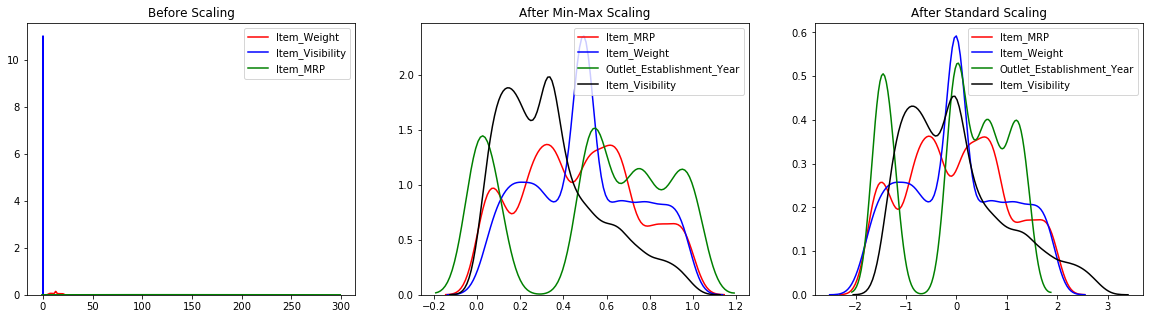

In [41]:
#this plot to show best scaler shod we chose
scaler = StandardScaler()
standard_df = scaler.fit_transform(encodin_x_train[['Item_MRP', 'Item_Weight',"Outlet_Establishment_Year","Item_Visibility"]])
standard_df = pd.DataFrame(standard_df, columns =['Item_MRP', 'Item_Weight',"Outlet_Establishment_Year","Item_Visibility"])
 
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(encodin_x_train[['Item_MRP', 'Item_Weight',"Outlet_Establishment_Year","Item_Visibility"]])
minmax_df = pd.DataFrame(minmax_df, columns =['Item_MRP', 'Item_Weight',"Outlet_Establishment_Year","Item_Visibility"])
 
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
sns.kdeplot(X['Item_Weight'],ax=ax1,color='r')
sns.kdeplot(X['Item_Visibility'],ax=ax1,color='b')
sns.kdeplot(X['Item_MRP'],ax=ax1,color='g')
ax1.set_title('Before Scaling') 
sns.kdeplot(minmax_df['Item_MRP'], ax = ax2, color ='red')
sns.kdeplot(minmax_df['Item_Weight'], ax = ax2, color ='blue')
sns.kdeplot(minmax_df['Outlet_Establishment_Year'], ax = ax2, color ='g')
sns.kdeplot(minmax_df['Item_Visibility'], ax = ax2, color ='black')

ax2.set_title('After Min-Max Scaling')
 
sns.kdeplot(standard_df['Item_MRP'], ax = ax3, color ='red')
sns.kdeplot(standard_df['Item_Weight'], ax = ax3, color ='blue')
sns.kdeplot(standard_df['Outlet_Establishment_Year'], ax = ax3, color ='g')
sns.kdeplot(standard_df['Item_Visibility'], ax = ax3, color ='black')

ax3.set_title('After Standard Scaling')


 
plt.show()

from above figure i will do scaling with standard scaler

In [42]:
#sacle x_train data
scaler = StandardScaler()

scaling = scaler.fit_transform(encodin_x_train)
standard_x_train = pd.DataFrame(scaling, columns =encodin_x_train.columns)#convert to data frame

In [43]:
#sacle x_test data

scaling0 = scaler.transform(encodin_x_test)
standard_x_test = pd.DataFrame(scaling0, columns =encodin_x_test.columns)#convert to data frame

#### deal with all train data

train_df

In [208]:
#maping Outlet_Size
data={
    'High'   : 1,
    'Medium' : .5,
    'Small'  : 0
}
X.replace(data,inplace=True)

In [209]:
#encode and scale train data too
cols_to_encode = ['Item_Identifier', 'Item_Type','Outlet_Identifier','Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cols_to_encode:
    X[i]=le.fit_transform(X[i])
    
encodin_train_df=encoder1.fit_transform(X)

In [214]:
#scale all train data
scaler = StandardScaler()
scaling_train_df = scaler.fit_transform(encodin_train_df)
final_train = pd.DataFrame(scaling_train_df, columns =encodin_train_df.columns)#convert to data frame

In [213]:
final_df.shape

(8523, 25)

test_df

In [204]:
#maping Outlet_Size
data={
    'High'   : 1,
    'Medium' : .5,
    'Small'  : 0
}
test_df.replace(data,inplace=True)

In [205]:
#encode and scale train data too
cols_to_encode = ['Item_Identifier', 'Item_Type','Outlet_Identifier','Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cols_to_encode:
    test_df[i]=le.fit_transform(test_df[i])
    
encodin_test_df=encoder1.fit_transform(test_df)

In [206]:
#scale all train data
scaler = StandardScaler()
scaling_train_df = scaler.fit_transform(encodin_test_df)
final_test = pd.DataFrame(scaling_train_df, columns =encodin_test_df.columns)#convert to data frame

## apply models

In [51]:
#import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [52]:
xgb=XGBRFRegressor(max_depth=10,n_jobs=-1,random_state=24)
RandomForest=RandomForestRegressor(n_estimators=20,random_state=42)
lr=LinearRegression(n_jobs=-1)

models=[xgb,RandomForest,lr]

In [53]:
#for loop to chek accurcy for every model
for model in models:
    model.fit(standard_x_train,y_train)
    print(f"accuracy of train and model is {model}={model.score(standard_x_train,y_train)}")
    
    y_pred=model.predict(standard_x_test)
    print(f"mean_squared_error of test data{np.sqrt(mean_squared_error(y_pred,y_test))}")
    


    print("--------------------------------------------------------------------")

    print("--------------------------------------------------------------------")


accuracy of train and model is XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
               max_leaves=0, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=-1,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=24, reg_alpha=0,
               sampling_method='uniform', scale_pos_weight=1, ...)=0.7301128818435614
mean_squared_error of test data1046.51957431231
--------------------------------------------------------------------
--------------------------------------------------------------------
accuracy of train a

### lasso Regression 

In [54]:
from sklearn.linear_model import Lasso,Ridge
# Fit Lasso regression model
lasso=Lasso(alpha=10,random_state=42)
lasso.fit(standard_x_train,y_train)
print(f"score of train data{lasso.score(standard_x_train,y_train)}")#get score of train
y_bred=lasso.predict(standard_x_test)#predict test data
print(f"mean_squared_error of test data{np.sqrt(mean_squared_error(y_pred,y_test))}")

score of train data0.4992104593848582
mean_squared_error of test data1143.5394321084011


### ridge Regression

In [55]:
# Fit Ridge regression model
ridge=Ridge(alpha=10,random_state=42)
ridge.fit(standard_x_train,y_train)
print(f"score of train data{ridge.score(standard_x_train,y_train)}")#get score of train
y_bred=ridge.predict(standard_x_test)#predict test data
print(f"mean_squared_error of test data{np.sqrt(mean_squared_error(y_pred,y_test))}")

score of train data0.5002410891808468
mean_squared_error of test data1143.5394321084011


## feature selection

In [56]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

### xgboost

In [58]:
#try to get best 15 feature together with xgb , forward and cross validation '5'
seq_model= sfs(xgb,
        k_features=15,
        forward=True,
        cv=5,
        scoring="neg_mean_squared_error"
)

In [59]:
seq_model.fit(standard_x_train,y_train)#fit Xgboost 

SequentialFeatureSelector(estimator=XGBRFRegressor(base_score=0.5,
                                                   booster='gbtree',
                                                   callbacks=None,
                                                   colsample_bylevel=1,
                                                   colsample_bytree=1,
                                                   early_stopping_rounds=None,
                                                   enable_categorical=False,
                                                   eval_metric=None, gamma=0,
                                                   gpu_id=-1,
                                                   grow_policy='depthwise',
                                                   importance_type=None,
                                                   interaction_constraints='',
                                                   max_bin=256,
                                                   max_cat_to_oneh

In [62]:
#append best feature to list 
feat_names_15=list(seq_model.k_feature_names_)

In [63]:
#best 15 features together
feat_names_15

['Item_Identifier_0',
 'Item_Identifier_2',
 'Item_Identifier_4',
 'Item_Identifier_5',
 'Item_Identifier_7',
 'Item_Weight',
 'Item_Visibility',
 'Item_Type_0',
 'Item_Type_4',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [64]:
xgb.fit(standard_x_train[feat_names_15],y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
               max_leaves=0, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=-1,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=24, reg_alpha=0,
               sampling_method='uniform', scale_pos_weight=1, ...)

In [65]:
#fit model on selection feature
xgb.score(standard_x_train[feat_names_15],y_train)

0.7158112030444493

In [66]:
#get preduction result
y_pred_xgb=xgb.predict(standard_x_test[feat_names_15])

In [67]:
print(f"mean_squared_error of test data {np.sqrt(mean_squared_error(y_pred_xgb,y_test))}")

mean_squared_error of test data 1043.6321082603156


In [68]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred_xgb,y_test)}")

mean_absolute_error of test data 727.5168109099536


### try another model

In [69]:
#try to get best 17 feature together with xgb , backward and cross validation '5'
seq_model3= sfs(xgb,
        k_features=17,
        forward=False,
        cv=5,
        scoring="neg_mean_squared_error"
)

In [70]:
seq_model3.fit(standard_x_train,y_train)#fit model

SequentialFeatureSelector(estimator=XGBRFRegressor(base_score=0.5,
                                                   booster='gbtree',
                                                   callbacks=None,
                                                   colsample_bylevel=1,
                                                   colsample_bytree=1,
                                                   early_stopping_rounds=None,
                                                   enable_categorical=False,
                                                   eval_metric=None, gamma=0,
                                                   gpu_id=-1,
                                                   grow_policy='depthwise',
                                                   importance_type=None,
                                                   interaction_constraints='',
                                                   max_bin=256,
                                                   max_cat_to_oneh

In [71]:
feat_names_17=list(seq_model3.k_feature_names_)#get best features name

In [72]:
feat_names_17

['Item_Identifier_0',
 'Item_Identifier_2',
 'Item_Identifier_4',
 'Item_Identifier_5',
 'Item_Identifier_7',
 'Item_Identifier_9',
 'Item_Identifier_10',
 'Item_Weight',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_3',
 'Item_Type_4',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Type']

In [73]:
#fit model on selection feature
xgb.fit(standard_x_train[feat_names_17],y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
               max_leaves=0, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=-1,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=24, reg_alpha=0,
               sampling_method='uniform', scale_pos_weight=1, ...)

In [74]:
#check score
xgb.score(standard_x_train[feat_names_17],y_train)

0.7258358130778482

In [75]:
#predict x_test
y_pred1_xgboost=xgb.predict(standard_x_test[feat_names_17])

In [76]:
print(f"mean_squared_error of test data {np.sqrt(mean_squared_error(y_pred1_xgboost,y_test))}")

mean_squared_error of test data 1044.2156484041302


In [77]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred1_xgboost,y_test)}")

mean_absolute_error of test data 728.570350156991


### try another model

In [92]:
#try to get best 20 feature together with xgb , forward and cross validation '5'
seq_model1= sfs(xgb,
        k_features=20,
        forward=True,
        cv=5,
        scoring="neg_mean_squared_error"
)

In [93]:
seq_model1.fit(standard_x_train,y_train)#fit Xgboost 

SequentialFeatureSelector(estimator=XGBRFRegressor(base_score=0.5,
                                                   booster='gbtree',
                                                   callbacks=None,
                                                   colsample_bylevel=1,
                                                   colsample_bytree=1,
                                                   early_stopping_rounds=None,
                                                   enable_categorical=False,
                                                   eval_metric=None, gamma=0,
                                                   gpu_id=-1,
                                                   grow_policy='depthwise',
                                                   importance_type=None,
                                                   interaction_constraints='',
                                                   max_bin=256,
                                                   max_cat_to_oneh

In [94]:
#append best feature to list 
feat_names_20=list(seq_model1.k_feature_names_)

In [95]:
#best 20 features together
feat_names_20

['Item_Identifier_0',
 'Item_Identifier_2',
 'Item_Identifier_4',
 'Item_Identifier_5',
 'Item_Identifier_6',
 'Item_Identifier_7',
 'Item_Identifier_9',
 'Item_Weight',
 'Item_Visibility',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_3',
 'Item_Type_4',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [96]:
#fit model on selection feature
xgb.fit(standard_x_train[feat_names_20],y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
               max_leaves=0, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=-1,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=24, reg_alpha=0,
               sampling_method='uniform', scale_pos_weight=1, ...)

In [97]:
#check score
xgb.score(standard_x_train[feat_names_20],y_train)

0.7257281973374562

In [98]:
#get preduction result
y_pred1_xgb=xgb.predict(standard_x_test[feat_names_20])

In [99]:
#check errors
print(f"mean_squared_error of test data {np.sqrt(mean_squared_error(y_pred1_xgb,y_test))}")

mean_squared_error of test data 1043.7387633480218


In [188]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred1_xgb,y_test)}")

mean_absolute_error of test data 727.120805155287


### random forest

In [101]:
#try to get best 15 feature together with Randomforest , forward and cross validation '5'
seq_model2= sfs(RandomForest,
        k_features=15,
        forward=True,
        cv=5,
        scoring="r2"
)

In [102]:
seq_model2.fit(standard_x_train,y_train)#fit RandomForest 

SequentialFeatureSelector(estimator=RandomForestRegressor(n_estimators=20,
                                                          random_state=42),
                          k_features=(15, 15), scoring='r2')

In [103]:
#append best feature to list 
feat_names_15_rf=list(seq_model2.k_feature_names_)

In [104]:
#best 15 features together
feat_names_15_rf

['Item_Identifier_0',
 'Item_Identifier_1',
 'Item_Identifier_2',
 'Item_Identifier_5',
 'Item_Identifier_7',
 'Item_Identifier_8',
 'Item_Visibility',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_4',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type']

In [105]:
#fit model on selection feature
RandomForest.fit(standard_x_train[feat_names_15_rf],y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [106]:
#check score
RandomForest.score(standard_x_train[feat_names_15_rf],y_train)

0.9291546840276692

In [107]:
#predict x_test
y_pred_rf=RandomForest.predict(standard_x_test[feat_names_15_rf])

In [108]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred_rf,y_test)}")

mean_absolute_error of test data 755.6097067448679


### try another model

In [196]:
#try to get best 20 feature together with Randomforest , forward and cross validation '5'
seq_model_rf3= sfs(RandomForest,
        k_features=20,
        forward=True,
        cv=5,
        scoring="neg_mean_squared_error"
)

In [197]:
seq_model_rf3.fit(standard_x_train,y_train)#fit RandomForest 

SequentialFeatureSelector(estimator=RandomForestRegressor(n_estimators=20,
                                                          random_state=42),
                          k_features=(20, 20),
                          scoring='neg_mean_squared_error')

In [198]:
#append best feature to list 
feat_names_20=list(seq_model_rf3.k_feature_names_)

In [199]:
feat_names_20

['Item_Identifier_0',
 'Item_Identifier_1',
 'Item_Identifier_2',
 'Item_Identifier_3',
 'Item_Identifier_4',
 'Item_Identifier_5',
 'Item_Identifier_7',
 'Item_Identifier_8',
 'Item_Identifier_10',
 'Item_Visibility',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_4',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [200]:
RandomForest.fit(standard_x_train[feat_names_20],y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [201]:
RandomForest.score(standard_x_train[feat_names_20],y_train)

0.9303462932430137

In [202]:
y_pred_rf0=RandomForest.predict(standard_x_test[feat_names_20])

In [203]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred_rf0,y_test)}")

mean_absolute_error of test data 738.7800879765394


## hyperparameter tuning

In [111]:
from sklearn.model_selection import RandomizedSearchCV

### XGBRgressor RandomizedSearch

In [189]:
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.logspace(-3, 0, 4),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'reg_alpha': np.logspace(-5, 0, 6),

}

# Create the XGBoost regressor
xgb_clf = XGBRFRegressor()

# Perform the Randomized SearchCV
rs_clf = RandomizedSearchCV(xgb_clf,
                            param_grid,
                            n_iter=100,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1,
                            random_state=42)
rs_clf.fit(standard_x_train,y_train)

# Print the best hyperparameters
print('Best hyperparameters:', rs_clf.best_params_)


Best hyperparameters: {'subsample': 0.6, 'reg_alpha': 1.0, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 1.0, 'colsample_bytree': 1.0}


In [190]:
print('Best score:',np.sqrt(-1*rs_clf.best_score_))

Best score: 1096.4927944432663


In [191]:
#get best param and give it to model
best_xgb = XGBRFRegressor(n_estimators=rs_clf.best_params_['n_estimators'], 
                                 max_depth=rs_clf.best_params_['max_depth'],
                                learning_rate=rs_clf.best_params_['learning_rate'],
                                subsample=rs_clf.best_params_['subsample'],
                                colsample_bytree=rs_clf.best_params_['colsample_bytree'],
                                reg_alpha=rs_clf.best_params_['reg_alpha'],

                                random_state=20
                               )

In [192]:
best_xgb.fit(standard_x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1.0,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=700, n_jobs=0, num_parallel_tree=700,
               objective='reg:squarederror', predictor='auto', random_state=20,
               reg_alpha=1.0, sampling_method='uniform', scale_pos_weight=1, ...)

In [193]:
best_xgb.score(standard_x_train,y_train)*100

63.74222937977711

In [194]:
best_xgb_pred=best_xgb.predict(standard_x_test)

In [195]:
print(f"mean_absolute_error of test data {mean_absolute_error(best_xgb_pred,y_test)}")

mean_absolute_error of test data 715.5242713010905


### Random Forest RandomizedSearch

In [137]:
# Define the hyperparameter space for the model
param_dist = {
    'n_estimators': range(100, 1000),
    'max_features': range(1, 10),
    'max_depth': range(10, 100),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
}

# Create the Random forest regressor
rf = RandomForestRegressor()

# Define the randomized search object
random_search = RandomizedSearchCV(
    rf,
    param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

# Fit the randomized search object to the data
random_search.fit(standard_x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 592, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 32}


In [138]:
#get best param and give it to model
best_rf = RandomForestRegressor(n_estimators=random_search.best_params_['n_estimators'], 
                                max_features=random_search.best_params_['max_features'],
                                max_depth=random_search.best_params_['max_depth'],
                                min_samples_split=random_search.best_params_['min_samples_split'],
                                min_samples_leaf=random_search.best_params_['min_samples_leaf']
                               )

In [139]:
#fit best param
best_rf.fit(standard_x_train,y_train)

RandomForestRegressor(max_depth=32, max_features=8, min_samples_leaf=5,
                      min_samples_split=4, n_estimators=592)

In [140]:
best_rf.score(standard_x_train,y_train)

0.7631501226866627

In [141]:
best_rf_pred=best_rf.predict(standard_x_test)

In [142]:
print(f"mean_absolute_error of test data {mean_absolute_error(best_rf_pred,y_test)}")

mean_absolute_error of test data 719.8088628353019


#### linear regression RandomizedSearch

In [118]:
# Define the linear regression model
lr = LinearRegression()

# Define the hyperparameter space for the model
hyperparameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    
}

# Define the randomized search object
random_search = RandomizedSearchCV(
    lr,
    hyperparameters,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search object to the data
random_search.fit(standard_x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'positive': False, 'normalize': True, 'fit_intercept': True, 'copy_X': True}


D:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [121]:
#get best param and give it to model
best_lr=LinearRegression(
    fit_intercept=random_search.best_params_["fit_intercept"],
    normalize=random_search.best_params_["normalize"],
    copy_X=random_search.best_params_["copy_X"],
    positive=random_search.best_params_["positive"]
)

In [122]:
best_lr.fit(standard_x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [124]:
best_lr.score(standard_x_train,y_train)

0.5002435688729929

In [126]:
y_pred_best_lr=best_lr.predict(standard_x_test)

In [127]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred_best_lr,y_test)}")

mean_absolute_error of test data 861.1632553465424


## Grid search


In [154]:
from sklearn.model_selection import GridSearchCV

In [168]:
# Define the XGBoost model
XGB=XGBRFRegressor()
# Define the hyperparameter space for the model
hyperparameters = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Define the grid search object
grid_search = GridSearchCV(
    XGB,
    hyperparameters,
    cv=5,
    n_jobs=-1,
    scoring="r2"
)

# Fit the grid search object to the data
grid_search.fit(standard_df, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:" , grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


In [170]:
#get best param and give it to model
best_xgb = XGBRFRegressor(n_estimators=grid_search.best_params_['n_estimators'], 
                                 max_depth=grid_search.best_params_['max_depth'],
                                learning_rate=grid_search.best_params_['learning_rate'],
                                subsample=grid_search.best_params_['subsample'],
                                colsample_bytree=grid_search.best_params_['colsample_bytree'],
                                random_state=20
                               )

In [171]:
best_xgb.fit(standard_x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1.0,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=300,
               n_jobs=0, num_parallel_tree=300, objective='reg:squarederror',
               predictor='auto', random_state=20, reg_alpha=0,
               sampling_method='uniform', ...)

In [172]:
best_xgb.score(standard_x_train,y_train)

-1.2086363385789944

In [173]:
y_pred_xgb_grid=best_xgb.predict(standard_x_test)

In [174]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred_xgb_grid,y_test)}")

mean_absolute_error of test data 1883.892252362998


### another model

In [159]:
# Define the random forest model
rf = RandomForestRegressor()

# Define the hyperparameter space for the model
hyperparameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the grid search object
grid_search = GridSearchCV(
    rf,
    hyperparameters,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Fit the grid search object to the data
grid_search.fit(standard_x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [160]:
#get best param and give it to model
best_rf = RandomForestRegressor(n_estimators=random_search.best_params_['n_estimators'], 
                                max_depth=random_search.best_params_['max_depth'],
                                min_samples_split=random_search.best_params_['min_samples_split'],
                                min_samples_leaf=random_search.best_params_['min_samples_leaf']
                               )

In [161]:
best_rf.fit(standard_x_train,y_train)

RandomForestRegressor(max_depth=32, min_samples_leaf=5, min_samples_split=4,
                      n_estimators=592)

In [162]:
best_rf.score(standard_x_train,y_train)

0.7976417356644194

In [163]:
y_pred_rf_grid=best_rf.predict(standard_x_test)

In [164]:
print(f"mean_absolute_error of test data {mean_absolute_error(y_pred_rf_grid,y_test)}")

mean_absolute_error of test data 726.1934808027054


In [167]:
print(f"mean_squared_error of test data {np.sqrt(mean_squared_error(y_pred_rf_grid,y_test))}")

mean_absolute_error of test data 1039.8986577474398


###### after tyring all of this models i will chose XGBRgressor RandomizedSearch to fit train data set and predict test data set
###### the mean absolute error was 715 and this was the minimum value i got

In [215]:
# Define the hyperparameter space for the model
param_grid = {
    'n_estimators': np.arange(1000, 1000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.logspace(-3, 0, 4),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'reg_alpha': np.logspace(-5, 0, 6),

}

# Create the XGBoost regressor
xgb_clf = XGBRFRegressor()

# Perform the Randomized SearchCV
rs_clf = RandomizedSearchCV(xgb_clf,
                            param_grid,
                            n_iter=100,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1,
                            random_state=42)
rs_clf.fit(final_train,y)

# Print the best hyperparameters
print('Best hyperparameters:', rs_clf.best_params_)

Best hyperparameters: {'subsample': 0.6, 'reg_alpha': 1.0, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 1.0, 'colsample_bytree': 1.0}


In [216]:
print('Best score:',np.sqrt(-1*rs_clf.best_score_))

Best score: 1084.440869282814


In [217]:
#get best param and give it to model
best_xgb = XGBRFRegressor(n_estimators=rs_clf.best_params_['n_estimators'], 
                                 max_depth=rs_clf.best_params_['max_depth'],
                                learning_rate=rs_clf.best_params_['learning_rate'],
                                subsample=rs_clf.best_params_['subsample'],
                                colsample_bytree=rs_clf.best_params_['colsample_bytree'],
                                reg_alpha=rs_clf.best_params_['reg_alpha'],
                                random_state=42
                               )

In [218]:
best_xgb.fit(final_train,y)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1.0,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=700, n_jobs=0, num_parallel_tree=700,
               objective='reg:squarederror', predictor='auto', random_state=20,
               reg_alpha=1.0, sampling_method='uniform', scale_pos_weight=1, ...)

In [221]:
best_xgb.score(final_train,y)*100

63.459778799632275

In [220]:
best_xgb_pred=best_xgb.predict(final_test)

In [244]:
pd.DataFrame(best_xgb_pred,columns=['Target']).to_csv("final_prediction.csv",index=False)

# summary

I have explored various methods to improve the accuracy of my model, and after conducting a thorough evaluation, I found that the XGBoost RandomizedSearch algorithm outperformed the other methods. Although feature selection also yielded good accuracy, the RandomizedSearch algorithm proved to be the most effective approach in achieving optimal results.

I experimented with three different models, including linear regression, XGBoost, and Randomsearch. While XGBoost and Randomsearch were comparable in terms of their accuracy, the linear regression model performed poorly in comparison.
